##**Importing  necessary libraries and packages**

In [ ]:
import pandas as pd 
import numpy as np
import json
import gzip
import seaborn as sb
import warnings
warnings.filterwarnings(action='ignore')

## **Fetching json and Transforming gz file to DataFrame**

In [ ]:
def parse(path):
    g=gzip.open(path,'rb')
    for l in g:yield json.loads(l)
def getDf(path,nrows=None):
    i,df=0,{}
    for d in parse(path):
        df[i]=d
        i+=1
        if nrows and i >=nrows:break
    return pd.DataFrame.from_dict(df,orient='index')

###**Taking only the first 1 lakh rows**

In [ ]:
books_review=getDf('reviews_Books_5.json.gz',nrows=100000)

## **Fetching the first 5 rows of Books review data**

In [ ]:
books_review.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book tha...,5.0,Wonderful!,1355616000,"12 16, 2012"
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5.0,close to god,1071100800,"12 11, 2003"
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""","[0, 0]",This book provides a reflection that you can a...,5.0,Must Read for Life Afficianados,1390003200,"01 18, 2014"
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,"[0, 0]",I first read THE PROPHET in college back in th...,5.0,Timeless for every good and bad time in your l...,1317081600,"09 27, 2011"
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,"[7, 9]",A timeless classic. It is a very demanding an...,5.0,A Modern Rumi,1033948800,"10 7, 2002"


**Shape of Book review data**

In [ ]:
books_review.shape

(100000, 9)

**Installing TextBlob and related Python Libraries**

In [ ]:
pip install TextBlob

In [ ]:
# importing the libraries related to the data manipulation.
import numpy as np
import pandas as pd
import string

# importing the libraries related to the data_visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# TextBlob is a Python library for processing textual data.
from textblob import TextBlob

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

##**Data Understanding**

**Splitting the reviewtime column and getting year from the data**

In [ ]:
books_review['year']=books_review['reviewTime'].apply(lambda x:x.split(',')[1])

**Checking for missing values** 

In [ ]:
books_review.isnull().sum()  

reviewerID         0
asin               0
reviewerName      49
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
year               0
dtype: int64

**Droping the missing value**

In [ ]:
books_review.dropna(inplace=True)    

**Find the information about the given dataFrame including the index dtype and column dtypes, non-null values and memory usage.**


In [ ]:
books_review.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99951 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      99951 non-null  object 
 1   asin            99951 non-null  object 
 2   reviewerName    99951 non-null  object 
 3   helpful         99951 non-null  object 
 4   reviewText      99951 non-null  object 
 5   overall         99951 non-null  float64
 6   summary         99951 non-null  object 
 7   unixReviewTime  99951 non-null  int64  
 8   reviewTime      99951 non-null  object 
 9   year            99951 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.4+ MB


**Columns in our dataset**

In [ ]:
books_review.columns    

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'year'],
      dtype='object')

**Converting year Dataframe into int datatype**

In [ ]:
books_review['year'].astype('int')

0        2012
1        2003
2        2014
3        2011
4        2002
         ... 
99995    2010
99996    2010
99997    2012
99998    2004
99999    2013
Name: year, Length: 99951, dtype: int32

**Fetching unique years from the data**

In [ ]:
books_review['year'].unique()

array([' 2012', ' 2003', ' 2014', ' 2011', ' 2002', ' 2008', ' 2013',
       ' 2009', ' 2001', ' 2005', ' 2000', ' 2004', ' 2006', ' 2007',
       ' 2010', ' 1998', ' 1999', ' 1997', ' 1996'], dtype=object)

**Observations**
*   We have Books review data in Json format which we loaded and converted into dataframe to work
*   Books review data has  9 columns 
*   All columns are object ones except for overall and unixReviewTime
*   Mainly focused columns are 'asin,reviewText,overall and reviewTime'

##**Data Preprocessing**

**Sentiment Analysis**

We Have to do Sentiment Analysis of the Data to make it more appropriate and to analyze customer feedback, responses, and product reviews

Our interest is to do a analysis on reviewText column


In [ ]:
pd.options.mode.chained_assignment = None
df = books_review[["reviewText"]]
df["reviewText"] = df["reviewText"].astype(str)
df=df[:10000]

In [ ]:
df.shape

(10000, 1)

**Observation**

Doing Sentiment Analysis of all data is difficult
So we are taking top 10000 reviews and will do the sentiment on that

**1. Lowercasing the text of review_text:**

In [ ]:
df["lowercase_text"] = df["reviewText"].str.lower()
df.head()

,reviewText,lowercase_text
0,Spiritually and mentally inspiring! A book tha...,spiritually and mentally inspiring! a book tha...
1,This is one my must have books. It is a master...,this is one my must have books. it is a master...
2,This book provides a reflection that you can a...,this book provides a reflection that you can a...
3,I first read THE PROPHET in college back in th...,i first read the prophet in college back in th...
4,A timeless classic. It is a very demanding an...,a timeless classic. it is a very demanding an...


**2. Removal of punctuations present in the text:**

In [ ]:
Punctuation_remove = string.punctuation
def remove_punctuation(lowercase_text):
    """custom function to remove the punctuation"""
    return lowercase_text.translate(str.maketrans('', '', Punctuation_remove))

df["NoPunctuations_text"] = df["lowercase_text"].apply(lambda lowercase_text: remove_punctuation(lowercase_text))
df.head()

,reviewText,lowercase_text,NoPunctuations_text
0,Spiritually and mentally inspiring! A book tha...,spiritually and mentally inspiring! a book tha...,spiritually and mentally inspiring a book that...
1,This is one my must have books. It is a master...,this is one my must have books. it is a master...,this is one my must have books it is a masterp...
2,This book provides a reflection that you can a...,this book provides a reflection that you can a...,this book provides a reflection that you can a...
3,I first read THE PROPHET in college back in th...,i first read the prophet in college back in th...,i first read the prophet in college back in th...
4,A timeless classic. It is a very demanding an...,a timeless classic. it is a very demanding an...,a timeless classic it is a very demanding and...


**3. Removal of stopwords:**

In [ ]:
# importing the NLP library
import nltk
from nltk.corpus import stopwords
stopwords

<WordListCorpusReader in 'C:\\Users\\1784131\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1784131\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stopwords])

df["Nostopwords_text"] = df["NoPunctuations_text"].apply(lambda text: remove_stopwords(text))
df.head()

,reviewText,lowercase_text,NoPunctuations_text,Nostopwords_text
0,Spiritually and mentally inspiring! A book tha...,spiritually and mentally inspiring! a book tha...,spiritually and mentally inspiring a book that...,spiritually mentally inspiring book allows que...
1,This is one my must have books. It is a master...,this is one my must have books. it is a master...,this is one my must have books it is a masterp...,one must books masterpiece spirituality ill fi...
2,This book provides a reflection that you can a...,this book provides a reflection that you can a...,this book provides a reflection that you can a...,book provides reflection apply lifeand way try...
3,I first read THE PROPHET in college back in th...,i first read the prophet in college back in th...,i first read the prophet in college back in th...,first read prophet college back 60s book reviv...
4,A timeless classic. It is a very demanding an...,a timeless classic. it is a very demanding an...,a timeless classic it is a very demanding and...,timeless classic demanding assuming title gibr...


**4. Removal of Frequent words:**

In [ ]:
from collections import Counter
cnt = Counter()
for text in df["Nostopwords_text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('book', 16876),
 ('read', 7654),
 ('story', 6620),
 ('one', 6328),
 ('characters', 5087),
 ('books', 4200),
 ('like', 4041),
 ('series', 3324),
 ('time', 3313),
 ('would', 3240)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["NoFreqwords_text"] = df["Nostopwords_text"].apply(lambda text: remove_freqwords(text))
df.head()

,reviewText,lowercase_text,NoPunctuations_text,Nostopwords_text,NoFreqwords_text
0,Spiritually and mentally inspiring! A book tha...,spiritually and mentally inspiring! a book tha...,spiritually and mentally inspiring a book that...,spiritually mentally inspiring book allows que...,spiritually mentally inspiring allows question...
1,This is one my must have books. It is a master...,this is one my must have books. it is a master...,this is one my must have books it is a masterp...,one must books masterpiece spirituality ill fi...,must masterpiece spirituality ill first admit ...
2,This book provides a reflection that you can a...,this book provides a reflection that you can a...,this book provides a reflection that you can a...,book provides reflection apply lifeand way try...,provides reflection apply lifeand way try asse...
3,I first read THE PROPHET in college back in th...,i first read the prophet in college back in th...,i first read the prophet in college back in th...,first read prophet college back 60s book reviv...,first prophet college back 60s revival anythin...
4,A timeless classic. It is a very demanding an...,a timeless classic. it is a very demanding an...,a timeless classic it is a very demanding and...,timeless classic demanding assuming title gibr...,timeless classic demanding assuming title gibr...


**5. Stemming:**

In [ ]:
from nltk.stem.porter import PorterStemmer

# Drop the four columns 
df.drop(["lowercase_text", "NoPunctuations_text","Nostopwords_text"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(NoFreqwords_text):
    return " ".join([stemmer.stem(word) for word in NoFreqwords_text.split()])

df["Stemmed_text"] = df["NoFreqwords_text"].apply(lambda NoFreqwords_text: stem_words(NoFreqwords_text))
df.head()

,reviewText,NoFreqwords_text,Stemmed_text
0,Spiritually and mentally inspiring! A book tha...,spiritually mentally inspiring allows question...,spiritu mental inspir allow question moral hel...
1,This is one my must have books. It is a master...,must masterpiece spirituality ill first admit ...,must masterpiec spiritu ill first admit litera...
2,This book provides a reflection that you can a...,provides reflection apply lifeand way try asse...,provid reflect appli lifeand way tri assess wh...
3,I first read THE PROPHET in college back in th...,first prophet college back 60s revival anythin...,first prophet colleg back 60 reviv anyth metap...
4,A timeless classic. It is a very demanding an...,timeless classic demanding assuming title gibr...,timeless classic demand assum titl gibran back...


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\1784131\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\1784131\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(Stemmed_text):
    return " ".join([lemmatizer.lemmatize(word) for word in Stemmed_text.split()])

df["Lemmatized_text"] = df["Stemmed_text"].apply(lambda Stemmed_text: lemmatize_words(Stemmed_text))
df.head()

,reviewText,NoFreqwords_text,Stemmed_text,Lemmatized_text
0,Spiritually and mentally inspiring! A book tha...,spiritually mentally inspiring allows question...,spiritu mental inspir allow question moral hel...,spiritu mental inspir allow question moral hel...
1,This is one my must have books. It is a master...,must masterpiece spirituality ill first admit ...,must masterpiec spiritu ill first admit litera...,must masterpiec spiritu ill first admit litera...
2,This book provides a reflection that you can a...,provides reflection apply lifeand way try asse...,provid reflect appli lifeand way tri assess wh...,provid reflect appli lifeand way tri ass wheth...
3,I first read THE PROPHET in college back in th...,first prophet college back 60s revival anythin...,first prophet colleg back 60 reviv anyth metap...,first prophet colleg back 60 reviv anyth metap...
4,A timeless classic. It is a very demanding an...,timeless classic demanding assuming title gibr...,timeless classic demand assum titl gibran back...,timeless classic demand assum titl gibran back...


**6. Removings of URLs, if there are no emojis and emoticons**

In [ ]:
# importing regular expression
import re
def remove_urls(Lemmatized_text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', Lemmatized_text)

df["URL_removed_text"] = df["Lemmatized_text"].apply(lambda Lemmatized_text: remove_urls(Lemmatized_text))
df.head()

,reviewText,NoFreqwords_text,Stemmed_text,Lemmatized_text,URL_removed_text
0,Spiritually and mentally inspiring! A book tha...,spiritually mentally inspiring allows question...,spiritu mental inspir allow question moral hel...,spiritu mental inspir allow question moral hel...,spiritu mental inspir allow question moral hel...
1,This is one my must have books. It is a master...,must masterpiece spirituality ill first admit ...,must masterpiec spiritu ill first admit litera...,must masterpiec spiritu ill first admit litera...,must masterpiec spiritu ill first admit litera...
2,This book provides a reflection that you can a...,provides reflection apply lifeand way try asse...,provid reflect appli lifeand way tri assess wh...,provid reflect appli lifeand way tri ass wheth...,provid reflect appli lifeand way tri ass wheth...
3,I first read THE PROPHET in college back in th...,first prophet college back 60s revival anythin...,first prophet colleg back 60 reviv anyth metap...,first prophet colleg back 60 reviv anyth metap...,first prophet colleg back 60 reviv anyth metap...
4,A timeless classic. It is a very demanding an...,timeless classic demanding assuming title gibr...,timeless classic demand assum titl gibran back...,timeless classic demand assum titl gibran back...,timeless classic demand assum titl gibran back...


**7. Removing of tags:**

In [ ]:
def remove_html(URL_removed_text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', URL_removed_text)

df["Tags_Removed_text"] = df["URL_removed_text"].apply(lambda URL_removed_text: remove_html(URL_removed_text))
df.head()

,reviewText,NoFreqwords_text,Stemmed_text,Lemmatized_text,URL_removed_text,Tags_Removed_text
0,Spiritually and mentally inspiring! A book tha...,spiritually mentally inspiring allows question...,spiritu mental inspir allow question moral hel...,spiritu mental inspir allow question moral hel...,spiritu mental inspir allow question moral hel...,spiritu mental inspir allow question moral hel...
1,This is one my must have books. It is a master...,must masterpiece spirituality ill first admit ...,must masterpiec spiritu ill first admit litera...,must masterpiec spiritu ill first admit litera...,must masterpiec spiritu ill first admit litera...,must masterpiec spiritu ill first admit litera...
2,This book provides a reflection that you can a...,provides reflection apply lifeand way try asse...,provid reflect appli lifeand way tri assess wh...,provid reflect appli lifeand way tri ass wheth...,provid reflect appli lifeand way tri ass wheth...,provid reflect appli lifeand way tri ass wheth...
3,I first read THE PROPHET in college back in th...,first prophet college back 60s revival anythin...,first prophet colleg back 60 reviv anyth metap...,first prophet colleg back 60 reviv anyth metap...,first prophet colleg back 60 reviv anyth metap...,first prophet colleg back 60 reviv anyth metap...
4,A timeless classic. It is a very demanding an...,timeless classic demanding assuming title gibr...,timeless classic demand assum titl gibran back...,timeless classic demand assum titl gibran back...,timeless classic demand assum titl gibran back...,timeless classic demand assum titl gibran back...


In [ ]:
df.drop(["Stemmed_text", "Lemmatized_text", "URL_removed_text"], axis=1, inplace=True)
df.head()

,reviewText,NoFreqwords_text,Tags_Removed_text
0,Spiritually and mentally inspiring! A book tha...,spiritually mentally inspiring allows question...,spiritu mental inspir allow question moral hel...
1,This is one my must have books. It is a master...,must masterpiece spirituality ill first admit ...,must masterpiec spiritu ill first admit litera...
2,This book provides a reflection that you can a...,provides reflection apply lifeand way try asse...,provid reflect appli lifeand way tri ass wheth...
3,I first read THE PROPHET in college back in th...,first prophet college back 60s revival anythin...,first prophet colleg back 60 reviv anyth metap...
4,A timeless classic. It is a very demanding an...,timeless classic demanding assuming title gibr...,timeless classic demand assum titl gibran back...


In [ ]:
df.drop(['NoFreqwords_text'],axis=1,inplace=True)

In [ ]:
df.head()

,reviewText,Tags_Removed_text
0,Spiritually and mentally inspiring! A book tha...,spiritu mental inspir allow question moral hel...
1,This is one my must have books. It is a master...,must masterpiec spiritu ill first admit litera...
2,This book provides a reflection that you can a...,provid reflect appli lifeand way tri ass wheth...
3,I first read THE PROPHET in college back in th...,first prophet colleg back 60 reviv anyth metap...
4,A timeless classic. It is a very demanding an...,timeless classic demand assum titl gibran back...


**Observations:**
*   Firstly we lowercased our data to bring all our text in one order and then removed punctuation marks if there is any
*   We removed stop words means the words that are not so much useful in our data,also the most frequent words
*  Performed Stemming and Lemmetisation to converts the word to its meaningful base form,

 Out of these two Lemmetisation performed in better way so we used Lemmetisation on our data

*   In the end removal of URLS and Tags were done to make our data more clean and understandable
*   Dropped all oher Unnecessary columns and kept only the resulted column namely 'Tags removed text'

##**Exploratory Data Analysis**

**Importing Visualisation Libraries**

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")

###**Can we estimate the count of each ratings?**

<AxesSubplot:xlabel='overall', ylabel='count'>

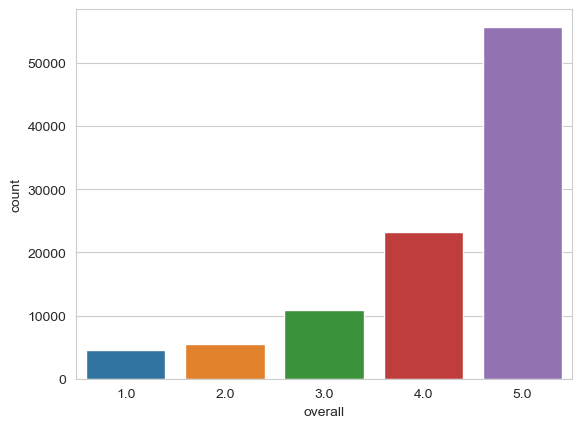

In [ ]:
sns.countplot(x='overall',data=books_review)

###**Box plot to visualise where most of the ratings lies**

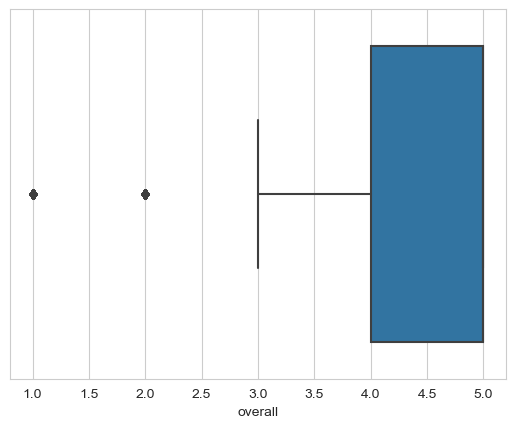

In [ ]:
sns.boxplot(x='overall',data=books_review)
plt.show()

###**What are the most Frequently used /Occuring words in the reviews?**

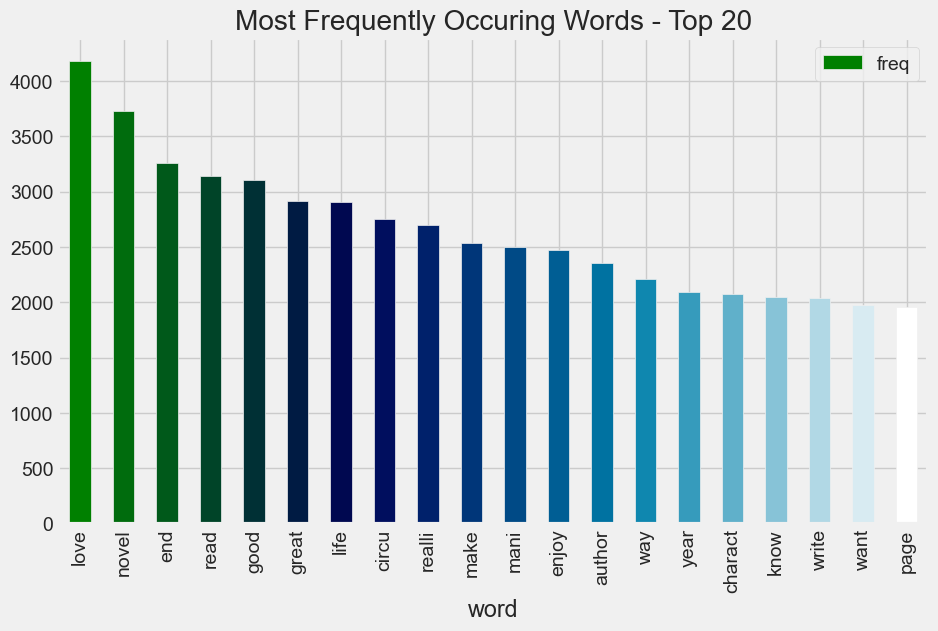

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Tags_Removed_text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(10, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

In [ ]:
!pip install wordcloud

### **Lets show the Wordscloud** 


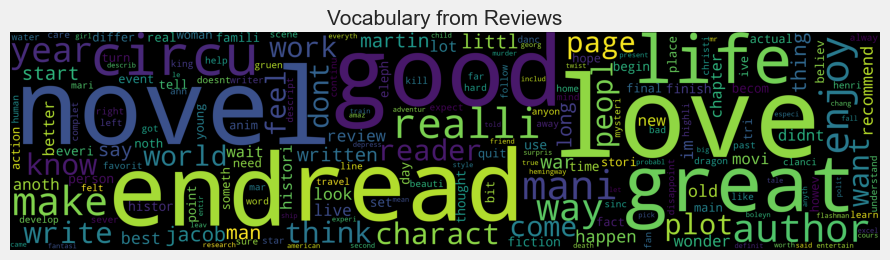

In [ ]:
# lets plot the Wordscloud
from wordcloud import WordCloud
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Tags_Removed_text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 4000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 15)
plt.show()

###**What's the Overall Trend of Ratings from 2008 to 2014**

In [ ]:
five=books_review[books_review['overall']==5]
four=books_review[books_review['overall']==4]
three=books_review[books_review['overall']==3]
two=books_review[books_review['overall']==2]
one=books_review[books_review['overall']==1]

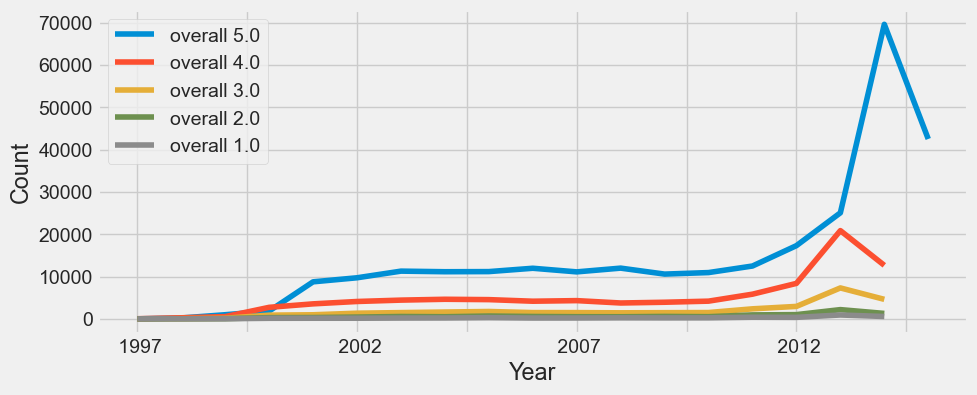

In [ ]:
plt.figure(figsize=(10,4))
five.groupby('year')['overall'].sum().plot(kind='line',label='overall 5.0')
four.groupby('year')['overall'].sum().plot(kind='line',label='overall 4.0')
three.groupby('year')['overall'].sum().plot(kind='line',label='overall 3.0')
two.groupby('year')['overall'].sum().plot(kind='line',label='overall 2.0')
one.groupby('year')['overall'].sum().plot(kind='line',label='overall 1.0')
plt.legend()
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

###**Lets see the impact of emotions on our reviews**

In [ ]:
enjoy=books_review[books_review['reviewText'].str.contains('enjoy')]
fun=books_review[books_review['reviewText'].str.contains('fun')]
happy=pd.concat([enjoy,fun],axis=0)
bad=books_review[books_review['reviewText'].str.contains('issu')]
hard=books_review[books_review['reviewText'].str.contains('worst')]
sad=pd.concat([bad,hard],axis=0)
old=books_review[books_review['reviewText'].str.contains('old')]
realiz=books_review[books_review['reviewText'].str.contains('realiz')]
anger=pd.concat([old,realiz],axis=0)
believ=books_review[books_review['reviewText'].str.contains('believ')]
recommend=books_review[books_review['reviewText'].str.contains('recommend')]
relationship=books_review[books_review['reviewText'].str.contains('relationship')]
loyal=pd.concat([believ,recommend,relationship],axis=0)

### **Top 20 products which user expresses their emotions**

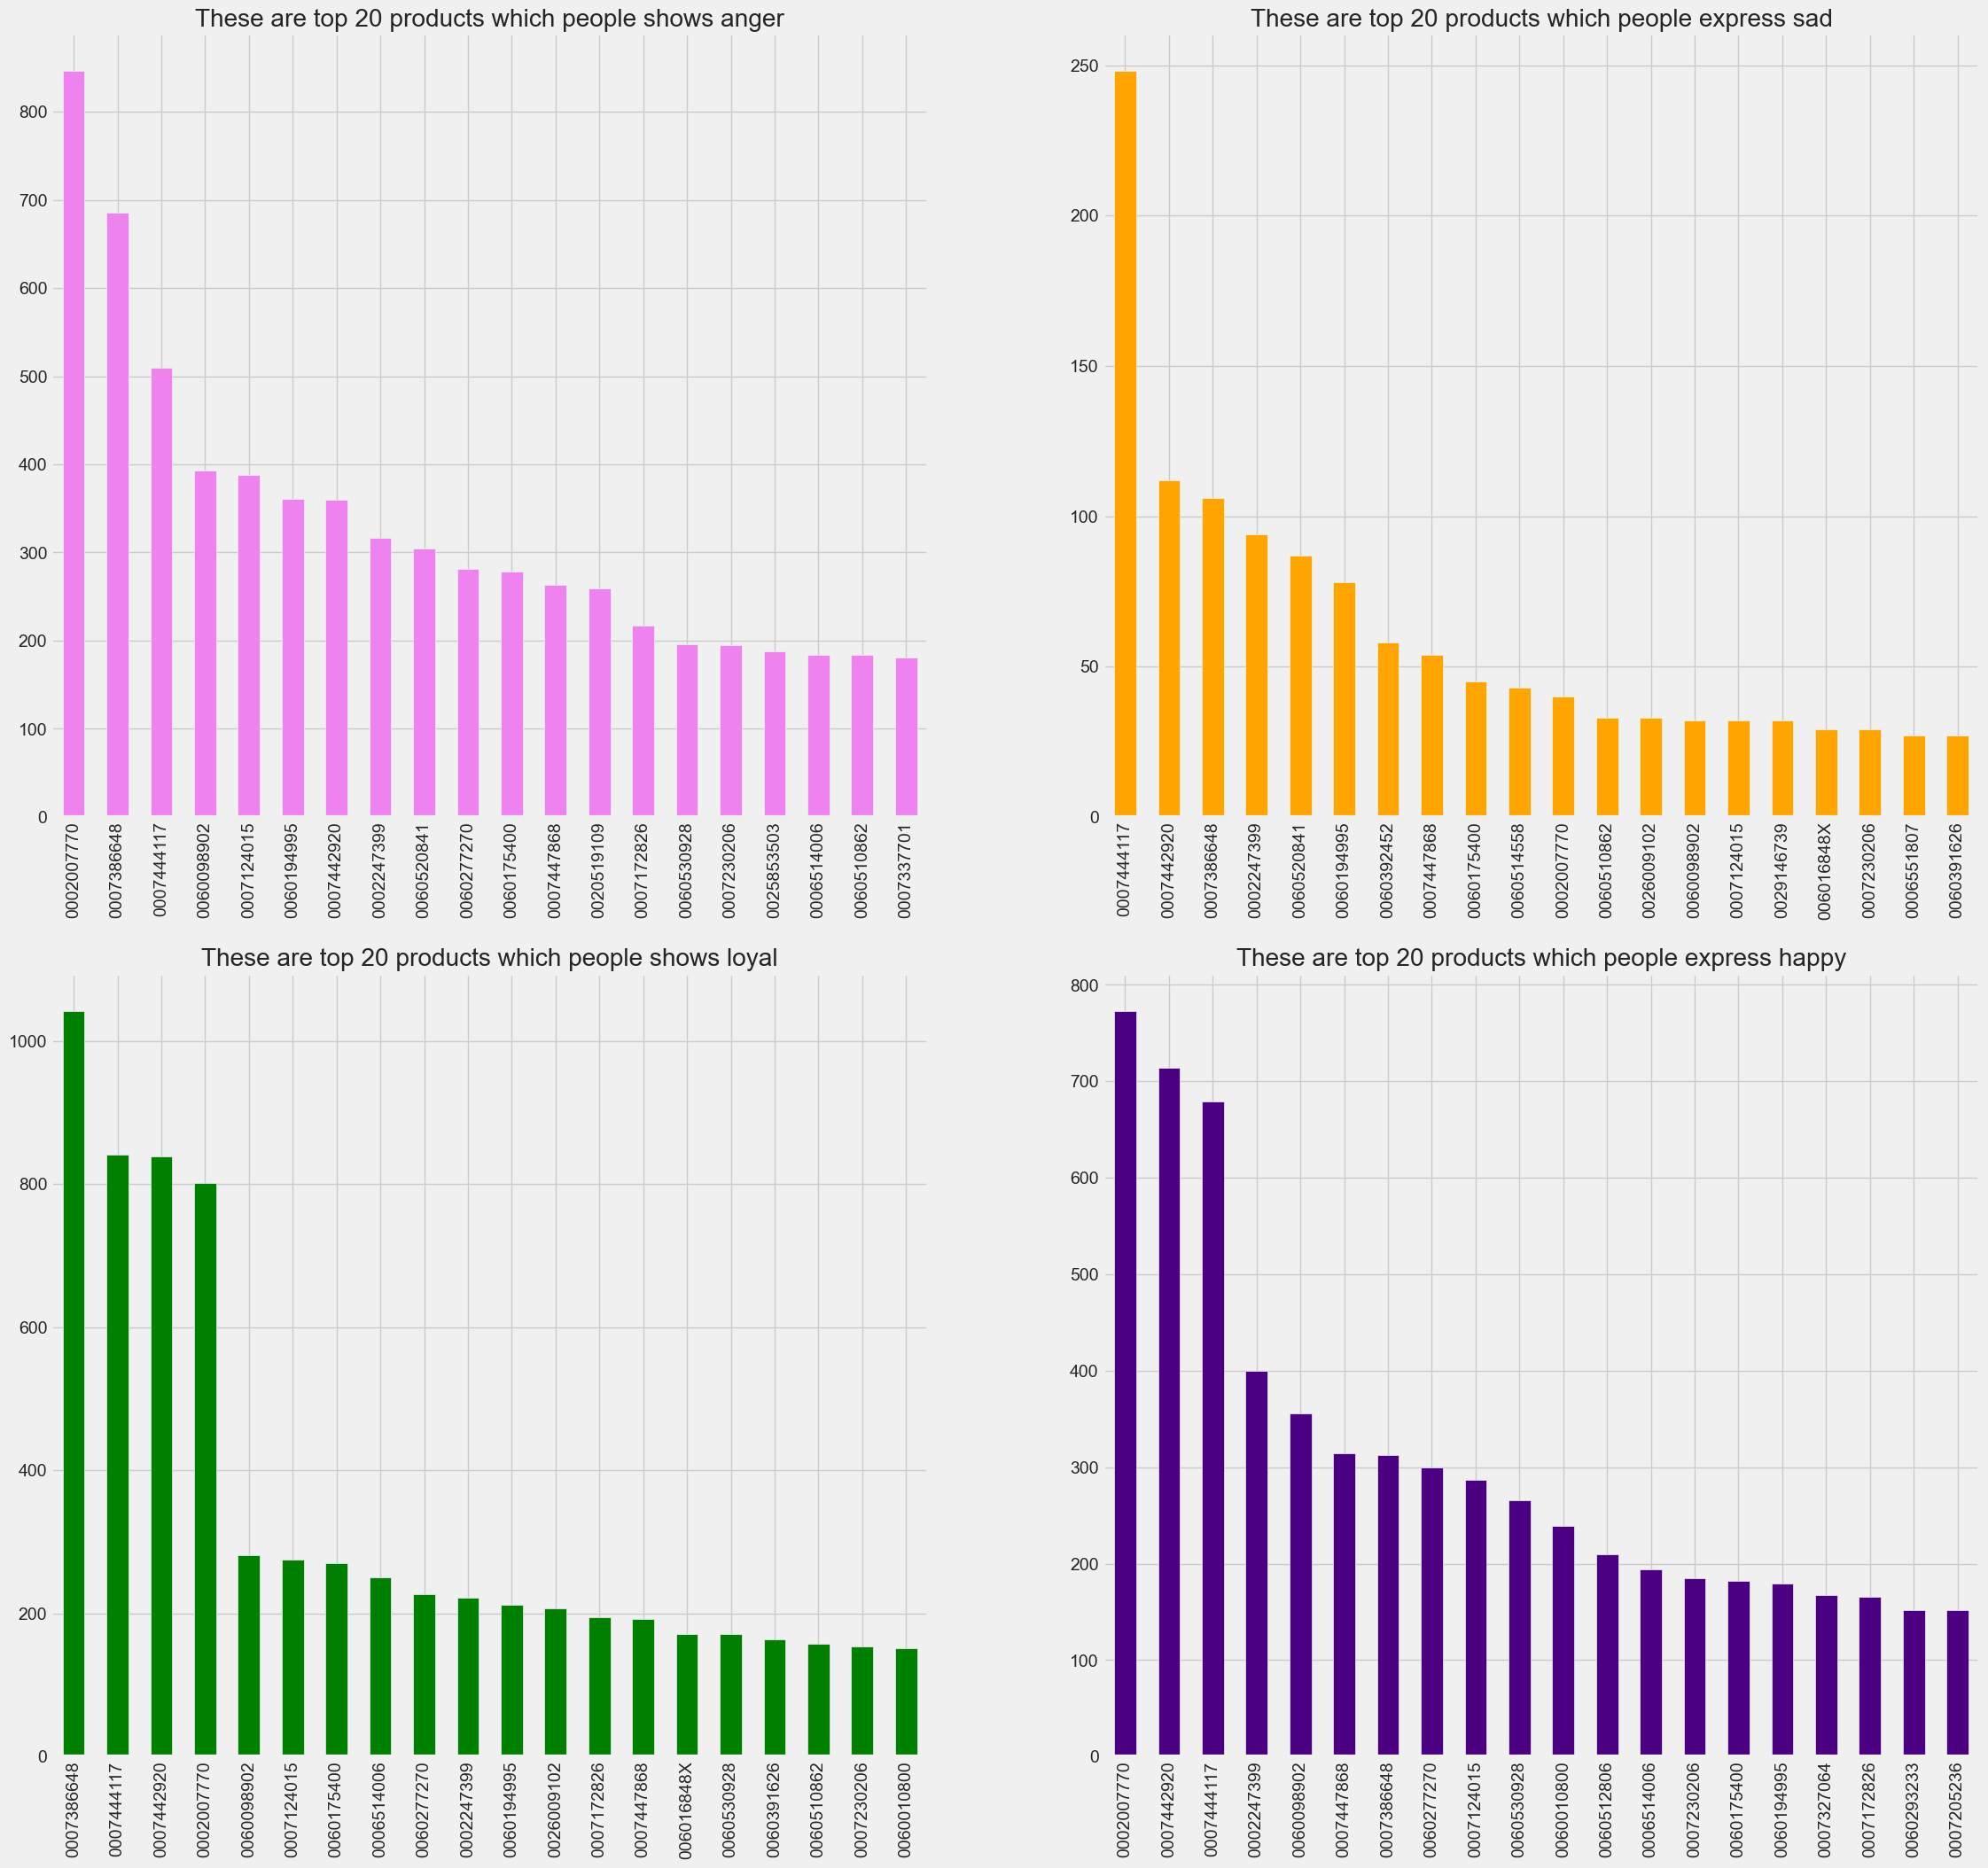

In [ ]:
plt.figure(figsize=(25,24))
plt.xlabel('product Id')
plt.ylabel('Count')
plt.subplot(2,2,1)
anger['asin'].value_counts()[:20].plot(kind='bar',color='violet')
plt.title('These are top 20 products which people shows anger')
plt.subplot(2,2,2)
sad['asin'].value_counts()[:20].plot(kind='bar',color='orange')
plt.title('These are top 20 products which people express sad')
plt.subplot(2,2,3)
loyal['asin'].value_counts()[:20].plot(kind='bar',color='green')
plt.title('These are top 20 products which people shows loyal')
plt.subplot(2,2,4)
happy['asin'].value_counts()[:20].plot(kind='bar',color='indigo')
plt.title('These are top 20 products which people express happy')
plt.show()

###**Getting the Top 10 products with average Rating**

In [ ]:
top_products=books_review['asin'].value_counts()[:10]

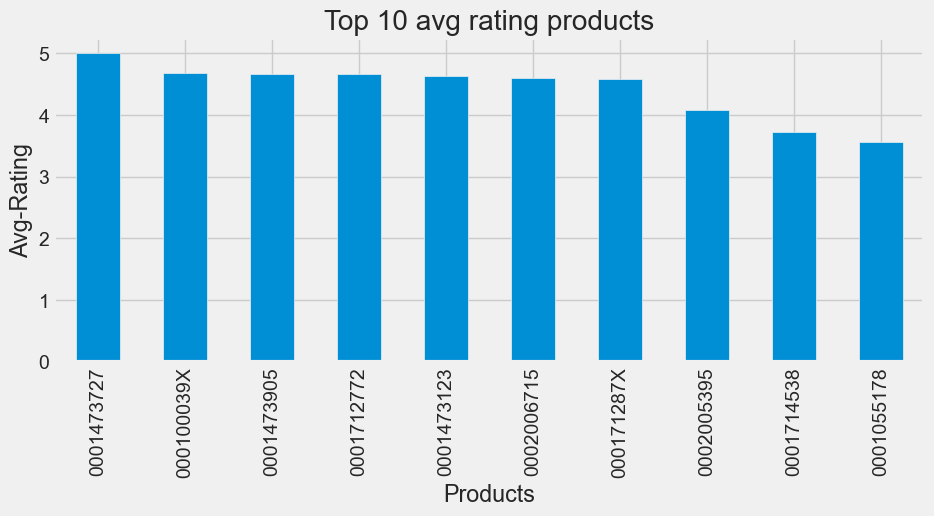

In [ ]:
plt.figure(figsize=(10,4))
books_review.groupby('asin')['overall'].mean()[:10].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Avg-Rating')
plt.title('Top 10 avg rating products')
plt.show()

**Observations:**

In the EDA section we start building graphs to represent the insights and answers to the questions that business demands

*   Firstly we plotted the estimated counts of each rating which shows **5 star rating are the highest while the 1 star ratings are lowest** which shows a positive impact
*   Box plot graph shows us that majority of ratings lies in **4 and 5 rating** 
*   AFter that the bar graph shows the top 20 most frequently used words in reviews in which **Love** was used maximum times
*   Wordcloud shows us the most commonly used words in a fun and more convinient way to read
*   The emotions that customer shows towards the products we have divided it in 4 parts -**happy anger sad and loyal emotions** ,and accordingly we have fetched top 20 products in that each emotion category

*  Overall Rating remains constant up to 2012, after onwards, we observed a slight increase in ratings count

*   In the end we have plotted the top 10 products that have average ratings


 





##**Text Preprocessing and Model Building**

**Estimating Polarity ,Subjectivity and Analsis Labels for our text Review data**

In [ ]:
from textblob import TextBlob

def getSubjectivity(Tags_Removed_text):
    return TextBlob(Tags_Removed_text).sentiment.subjectivity
    
def getPolarity(Tags_Removed_text):
    return TextBlob(Tags_Removed_text).sentiment.polarity

df ['polarity'] = df['Tags_Removed_text'].apply(getPolarity)
df['subjectivity'] = df['Tags_Removed_text'].apply(getSubjectivity)

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis_labels'] = df['polarity'].apply(lambda x: getAnalysis(x))

In [ ]:
df

,reviewText,Tags_Removed_text,polarity,subjectivity,Analysis_labels
0,Spiritually and mentally inspiring! A book tha...,spiritu mental inspir allow question moral hel...,-0.050000,0.225000,Negative
1,This is one my must have books. It is a master...,must masterpiec spiritu ill first admit litera...,-0.112500,0.558333,Negative
2,This book provides a reflection that you can a...,provid reflect appli lifeand way tri ass wheth...,0.142857,0.417857,Positive
3,I first read THE PROPHET in college back in th...,first prophet colleg back 60 reviv anyth metap...,0.081481,0.564815,Positive
4,A timeless classic. It is a very demanding an...,timeless classic demand assum titl gibran back...,0.129924,0.387247,Positive
...,...,...,...,...,...
9996,The thing you must realize about this book is ...,thing must realiz first foremost novel novel b...,0.152083,0.467361,Positive
9997,The Other Boleyn girl was a highly engrossing ...,boleyn girl highli engross novel amaz without ...,0.198214,0.458810,Positive
9998,Last week I finished reading The Other Boleyn ...,last week finish read boleyn girl philippa gre...,0.167500,0.330833,Positive
9999,I confess that I used to be a consistent reade...,confess use consist reader philippa gregori wo...,-0.020030,0.413718,Negative


**Observations:**

Using Text preprocessing we have estimated polarity ,subjectivity and Analysis labels for our review column

*   Polarity lies between -1 to 1 where -
```
polarity < 0 shows negative analysis
polarity = 0  shows Neutral analysis
polarity > 0  shows Positive analysis```

*  SUbjectivity lies between 0 to 1 and shows the strenght of emotions that review data has



###**Splitting the Data into Test and Train**

We are splitting our data in ratio of 80:20 raio with random state 0 
So that we can use 80% data to train our model and do testing on 20 % of our data




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df['Tags_Removed_text'],
                                                 df['Analysis_labels'],
                                                 test_size = 0.2,random_state = 0)

In [ ]:
X_train.shape

(8000,)

In [ ]:
X_test.shape

(2000,)

In [ ]:
df['Analysis_labels'].value_counts()

Positive    8123
Negative    1325
Neutral      552
Name: Analysis_labels, dtype: int64

**Observations:**


*   Our Train data has 8000 rows while test data has 2000 rows/values
*   Out of the total Analysis ,we can see that
```
8123 reviews have Positive polarity/feedback
1325 reviews have Negative polarity/feedback
While 552 are Neutral ones
 ```





### **Feature Extraction**
**Converting text data into respective numbers by TFID vectorizer**

In [ ]:
# importing the library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [ ]:
vect1 = TfidfVectorizer()
cv_train = vect1.fit_transform(X_train)
cv_test = vect1.transform(X_test)

###**Using classification to build different Supervised models**

**1).KNN Classifier:**


In [ ]:
#import KNN classifer and fit on the Training dataset
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(cv_train,y_train)

KNeighborsClassifier()

In [ ]:
# Accuracy score on training dataset
model1.score(cv_train,y_train)

0.837375

In [ ]:
# Accuracy on Test dataset
model1.score(cv_test,y_test)

0.7985

In [ ]:
# Performing prediction on Test dataset
expected = y_test
predicted = model1.predict(cv_test)

In [ ]:
# plot confusion matrix for the test dataset
from sklearn.metrics import confusion_matrix,classification_report

Text(22.78333333333333, 0.5, 'predicted')

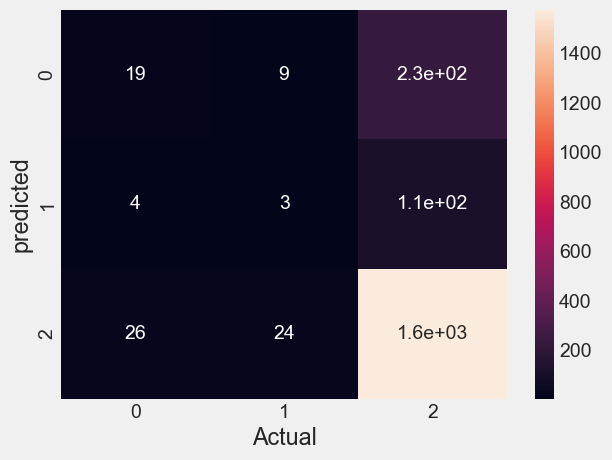

In [ ]:
cm=confusion_matrix(expected,predicted)
sb.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('predicted')

In [ ]:
print(classification_report(expected,predicted))

              precision    recall  f1-score   support

    Negative       0.39      0.07      0.12       257
     Neutral       0.08      0.03      0.04       118
    Positive       0.82      0.97      0.89      1625

    accuracy                           0.80      2000
   macro avg       0.43      0.36      0.35      2000
weighted avg       0.72      0.80      0.74      2000



**Observations:**

KNN Model gets Training Accuracy of 83.7
while Testing Accuracy of 79.8

Out of 2000 oservations-
1625 were positive 
257 were negative and 
118 were neautral

**2).Navie bais Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model2=MultinomialNB()

In [ ]:
model2.fit(cv_train,y_train)

MultinomialNB()

In [ ]:
# Accuracy score on training dataset
model2.score(cv_train,y_train)

0.8125

In [ ]:
# Accuracy on Test dataset
model1.score(cv_test,y_test)

0.7985

In [ ]:
# Performing prediction on Test dataset
expected = y_test
predicted = model2.predict(cv_test)

Text(22.78333333333333, 0.5, 'predicted')

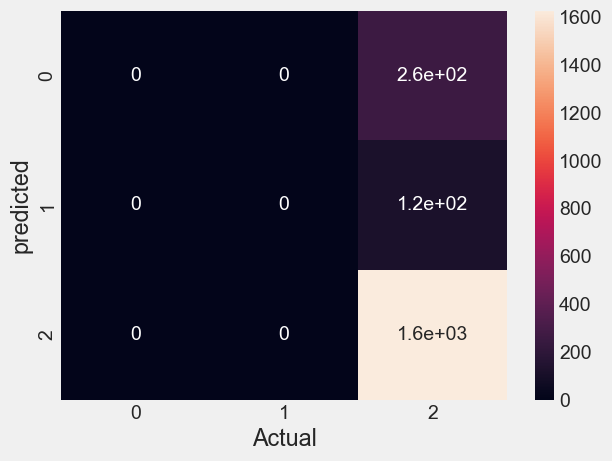

In [ ]:
cm=confusion_matrix(expected,predicted)
sb.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('predicted')

In [ ]:
print(classification_report(expected,predicted))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       257
     Neutral       0.00      0.00      0.00       118
    Positive       0.81      1.00      0.90      1625

    accuracy                           0.81      2000
   macro avg       0.27      0.33      0.30      2000
weighted avg       0.66      0.81      0.73      2000



**Observations:**

Naive Bais Model gets Training Accuracy of 81.2
while Testing Accuracy of 79.8

Out of 2000 oservations-
1625 were positive 
257 were negative and 
118 were neautral

**3).Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from numpy import mean,std
import seaborn as sb

In [ ]:
results=[]
rf=RandomForestClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=2)
n_scores2=cross_val_score(rf,cv_train,y_train,cv=cv,n_jobs=-1,error_score='raise')
results.append(n_scores2)

In [ ]:
results

[array([0.8125 , 0.81625, 0.81625, 0.81375, 0.81625, 0.8175 , 0.81125,
        0.81625, 0.8125 , 0.8125 , 0.82   , 0.8175 , 0.815  , 0.815  ,
        0.8175 , 0.81375, 0.8125 , 0.81625, 0.815  , 0.81375, 0.81375,
        0.815  , 0.81375, 0.81375, 0.81625, 0.8175 , 0.815  , 0.8125 ,
        0.8225 , 0.815  ])]

In [ ]:
print(mean(n_scores2))
print(std(n_scores2))

0.8152083333333333
0.0023735375614376895


In [ ]:
rf.fit(cv_train,y_train)

RandomForestClassifier()

In [ ]:
# predictions of random forest
predrandom=rf.predict(cv_test)

In [ ]:
print(confusion_matrix(y_test,predrandom))

[[   6    1  250]
 [   0    3  115]
 [   0    0 1625]]


In [ ]:
print(classification_report(y_test,predrandom))

              precision    recall  f1-score   support

    Negative       1.00      0.02      0.05       257
     Neutral       0.75      0.03      0.05       118
    Positive       0.82      1.00      0.90      1625

    accuracy                           0.82      2000
   macro avg       0.86      0.35      0.33      2000
weighted avg       0.84      0.82      0.74      2000



Text(22.78333333333333, 0.5, 'predicted')

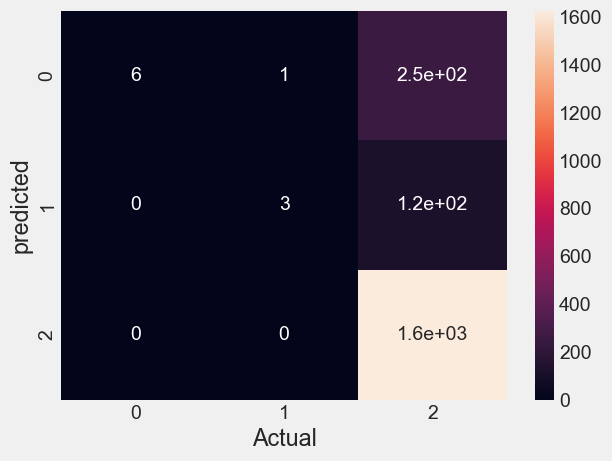

In [ ]:
# plot confusion matrix for the test dataset
cm=confusion_matrix(y_test,predrandom)
sb.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('predicted')

**Observations:**
Random forest model gets mean accuracy of 81.5

Out of 2000 oservations-
1625 were positive 
257 were negative and 
118 were neautral

**4).AdaBoost classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ab=AdaBoostClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=2)
n_scores3=cross_val_score(ab,cv_train,y_train,cv=cv,n_jobs=-1,error_score='raise')
results.append(n_scores3)

In [ ]:
print(mean(n_scores3))
print(std(n_scores3))

0.8352083333333332
0.011016480709474427


In [ ]:
# fitting the model
ab.fit(cv_train,y_train)

AdaBoostClassifier()

In [ ]:
predadaboost=ab.predict(cv_test)

Text(22.78333333333333, 0.5, 'predicted')

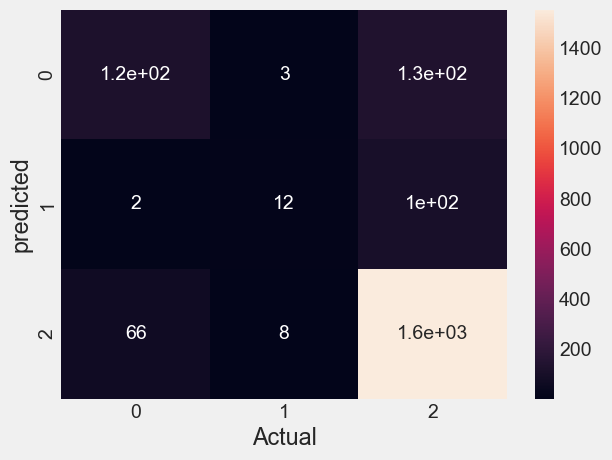

In [ ]:
# plot confusion matrix for the test dataset
cm=confusion_matrix(y_test,predadaboost)
sb.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('predicted')

In [ ]:
# printing classification report
print(classification_report(y_test,predadaboost))

              precision    recall  f1-score   support

    Negative       0.64      0.47      0.54       257
     Neutral       0.52      0.10      0.17       118
    Positive       0.87      0.95      0.91      1625

    accuracy                           0.84      2000
   macro avg       0.68      0.51      0.54      2000
weighted avg       0.82      0.84      0.82      2000



**Observations:**

AdaBoost Model gets Mean Accuracy of 83.5

Out of 2000 oservations-
1625 were positive 
257 were negative and 
118 were neautral

###**Result** 
Among all the algorithms,Adaboost gives best result with respect to precision,recall, accuracy and f1_score 

##**Time series Forecasrting**

**Importing time series libraries**

In [ ]:
import datetime

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller,acf,pacf

**Converting the reviewtime column into Date time format**

In [ ]:
books_review['reviewTime']=books_review['reviewTime'].str.replace(',','')

In [ ]:
books_review['reviewTime'] = pd.to_datetime(books_review['reviewTime'], errors='coerce')


**Fetching the first 1 lakh observations from Kindle review data**

In [ ]:
df2=books_review[:100000]

**Merging Polarity,subjectivity,analysis labels and processed review text into main Kindle data frame**

In [ ]:
df4=df2.merge(df)

In [ ]:
df4

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,year,Tags_Removed_text,polarity,subjectivity,Analysis_labels
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book tha...,5.0,Wonderful!,1355616000,2012-12-16,2012,spiritu mental inspir allow question moral hel...,-0.050000,0.225000,Negative
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5.0,close to god,1071100800,2003-12-11,2003,must masterpiec spiritu ill first admit litera...,-0.112500,0.558333,Negative
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""","[0, 0]",This book provides a reflection that you can a...,5.0,Must Read for Life Afficianados,1390003200,2014-01-18,2014,provid reflect appli lifeand way tri ass wheth...,0.142857,0.417857,Positive
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,"[0, 0]",I first read THE PROPHET in college back in th...,5.0,Timeless for every good and bad time in your l...,1317081600,2011-09-27,2011,first prophet colleg back 60 reviv anyth metap...,0.081481,0.564815,Positive
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,"[7, 9]",A timeless classic. It is a very demanding an...,5.0,A Modern Rumi,1033948800,2002-10-07,2002,timeless classic demand assum titl gibran back...,0.129924,0.387247,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,A10VOEBL5S337W,0006514006,"Meaghan ""meggilyweggily""","[0, 0]",The thing you must realize about this book is ...,5.0,"Realize that this is a novel, a very fluffy on...",1346630400,2012-09-03,2012,thing must realiz first foremost novel novel b...,0.152083,0.467361,Positive
9996,A3HBE3VAKQ7RYF,0006514006,"Megan @ Book Brats ""Book Brats Reviews""","[1, 1]",The Other Boleyn girl was a highly engrossing ...,4.0,Beautiful book about an amazing time period,1313539200,2011-08-17,2011,boleyn girl highli engross novel amaz without ...,0.198214,0.458810,Positive
9997,A2I5HGFRL5GVQJ,0006514006,Megan Kruljac,"[2, 4]",Last week I finished reading The Other Boleyn ...,4.0,An enjoyable read,1221264000,2008-09-13,2008,last week finish read boleyn girl philippa gre...,0.167500,0.330833,Positive
9998,A83MKA85YHNIX,0006514006,Meghan H,"[1, 1]",I confess that I used to be a consistent reade...,1.0,Why did I used to enjoy these books again?,1399161600,2014-05-04,2014,confess use consist reader philippa gregori wo...,-0.020030,0.413718,Negative


:**Taking only reviewtime and polarity column for time series analysis**

In [ ]:
df5=df4[['reviewTime','polarity']]

In [ ]:
df5

,reviewTime,polarity
0,2012-12-16,-0.050000
1,2003-12-11,-0.112500
2,2014-01-18,0.142857
3,2011-09-27,0.081481
4,2002-10-07,0.129924
...,...,...
9995,2012-09-03,0.152083
9996,2011-08-17,0.198214
9997,2008-09-13,0.167500
9998,2014-05-04,-0.020030


In [ ]:
df5.set_index('reviewTime',inplace=True)

##**Polarity of data over different Years**

<AxesSubplot:xlabel='reviewTime'>

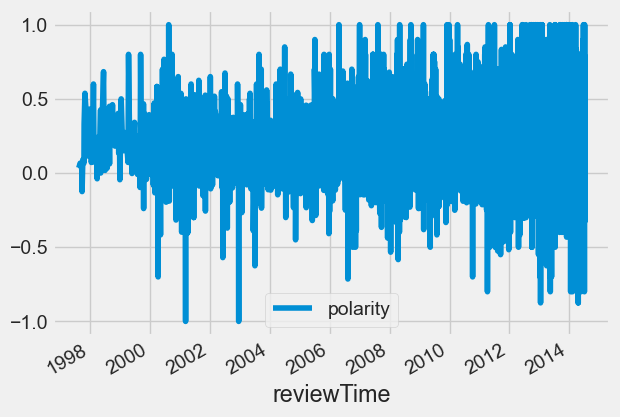

In [ ]:
df5.plot()

**Observations:**

We can see polarity is less or constant from 1998 to 2000 after that counts of reviews increased drasctically so we get this pattern and its maximum in 2014 

In [ ]:
df5.sort_index(inplace=True)

In [ ]:
df5.index

DatetimeIndex(['1997-08-13', '1997-08-30', '1997-09-21', '1997-09-22',
               '1997-10-01', '1997-10-13', '1997-10-15', '1997-10-17',
               '1997-10-27', '1997-11-25',
               ...
               '2014-07-10', '2014-07-10', '2014-07-10', '2014-07-10',
               '2014-07-11', '2014-07-11', '2014-07-11', '2014-07-11',
               '2014-07-11', '2014-07-11'],
              dtype='datetime64[ns]', name='reviewTime', length=10000, freq=None)

###**Checking the Seasonal Decomposition of Data over years**

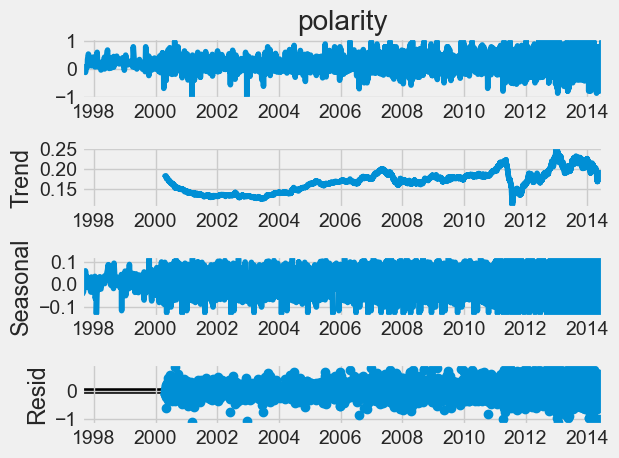

In [ ]:
result = seasonal_decompose(df5['polarity'], model='additive',period=365)
result.plot()
plt.show()

**Observation:**
*   While taking all data we can see there is a constant polarit over time 
*   But as we filter data from 2008 till 2014 we can see Trend ,seasonlaity and Resid is changing continously.

###**Checking stationery of Data**

In [ ]:
from statsmodels.tsa.stattools import adfuller
# dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [ ]:
# check the data for stationarity
ret=checkStationarity(df5); 
ret

'p-value=2.0897671466838594e-30. Data is stationary'

**Observations:**

While performing ADF test we can see p value is less than 0.5 so our Data is Staionery ,so we can proceed for model building

### **Triple exponential smoothing**

In [ ]:
# Triple exponential - when there is  trend/seasonality
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [ ]:
model = ExponentialSmoothing(df5,trend='add',seasonal='add',seasonal_periods=365).fit() 

C:\Users\1784131\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Triple Exponent Smoothing')

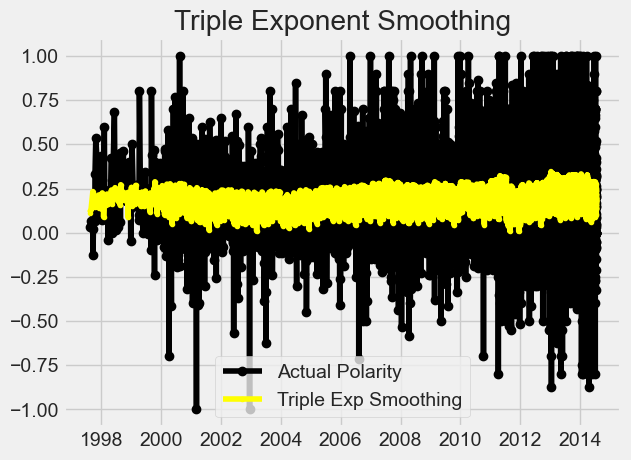

In [ ]:
#plot the actual and triple smoothing values
plt.plot(df5, marker='o',color='black',label='Actual Polarity')
plt.plot(model.fittedvalues,marker='.',color='yellow',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

Doing Triple smoothing technique to smooth our data 

###**Installing libraries and pmdarima to do ARIMA model Analysis**

In [ ]:
!pip install pmdarima

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

# pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

### **Plot ACF and PACF Plots**

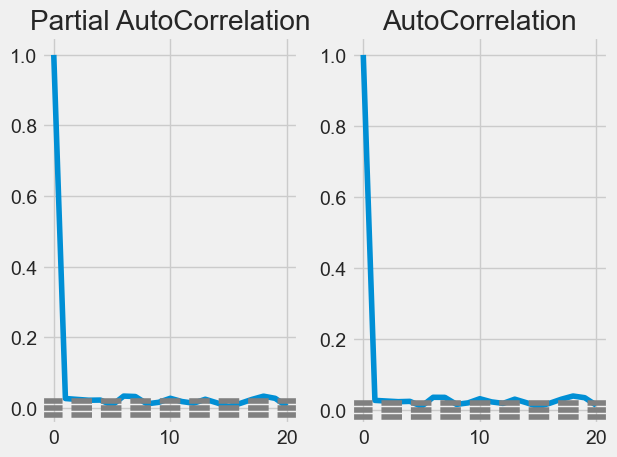

In [ ]:
# plot ACF and PACF Plots
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(df5, nlags=20)
lag_pacf = pacf(df5, nlags=20, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df5)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(df5)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df5)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(df5)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

### **Plotting correlogram for ACF and PACF**

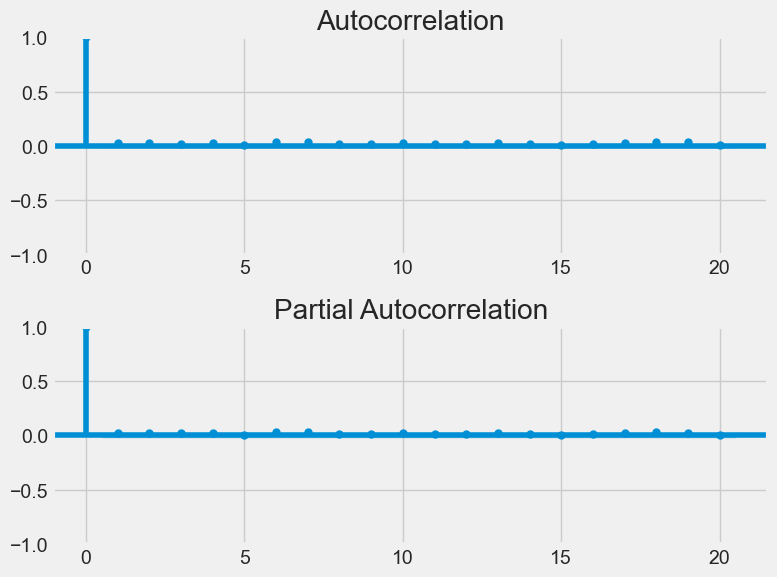

In [ ]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df5, lags=20, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df5, lags=20, ax=ax2)

plt.tight_layout()

###**Taking different values of p,q and d to check the best fit**

In [ ]:
# With p=3 and q=2
ar_m1 = ARIMA(df5, order = (3,0,2))
r1 = ar_m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:               polarity   No. Observations:                10000
Model:                 ARIMA(3, 0, 2)   Log Likelihood                1045.933
Date:                Mon, 24 Apr 2023   AIC                          -2077.867
Time:                        16:00:01   BIC                          -2027.394
Sample:                             0   HQIC                         -2060.782
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1855      0.011     17.592      0.000       0.165       0.206
ar.L1          0.0586      0.483      0.121      0.904      -0.889       1.006
ar.L2          0.9453      0.489      1.932      0.0

In [ ]:
# With p=2 and q=2
ar_m1 = ARIMA(df5, order = (2,1,2))
r1 = ar_m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:               polarity   No. Observations:                10000
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1041.238
Date:                Mon, 24 Apr 2023   AIC                          -2072.475
Time:                        15:58:51   BIC                          -2036.424
Sample:                             0   HQIC                         -2060.272
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9801      0.018    -55.466      0.000      -1.015      -0.945
ar.L2          0.0070      0.009      0.736      0.462      -0.012       0.026
ma.L1         -0.0047      0.015     -0.314      0.7

**ARMA Model with p=2,q=2 is the best one**

###**Split data into training and test**

Taking 70% data as training data and 30 % as testing data 
We will train our 70% data and will check how it works on ou testing 30 % data

In [ ]:
ss = int(0.7 * len(df5))

train = df5.iloc[:ss]
test = df5.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 7000, test = 3000


**Use test data to predict the Polarity using the Model**

In [ ]:
# predictions
start=len(train)
end=len(train)+len(test)
predictions = r1.predict(start-1,end-2)
print(predictions)

reviewTime
2013-02-15    0.222520
2013-02-16    0.221893
2013-02-16    0.229556
2013-02-16    0.223292
2013-02-16    0.225444
                ...   
2014-07-11    0.179009
2014-07-11    0.186069
2014-07-11    0.182889
2014-07-11    0.181404
2014-07-11    0.182924
Name: predicted_mean, Length: 3000, dtype: float64


**Converting reviewtime and polarity predictions into Dataframe**

In [ ]:
p1=pd.DataFrame(predictions)

**Resetting index of our dataframe**

In [ ]:
p1.reset_index(inplace=True)

In [ ]:
p1

,reviewTime,predicted_mean
0,2013-02-15,0.222520
1,2013-02-16,0.221893
2,2013-02-16,0.229556
3,2013-02-16,0.223292
4,2013-02-16,0.225444
...,...,...
2995,2014-07-11,0.179009
2996,2014-07-11,0.186069
2997,2014-07-11,0.182889
2998,2014-07-11,0.181404


In [ ]:
test

,polarity
reviewTime,
2013-02-16,0.800000
2013-02-16,0.200000
2013-02-16,0.260714
2013-02-16,0.650000
2013-02-16,0.450000
...,...
2014-07-11,0.106378
2014-07-11,0.000000
2014-07-11,0.212500


**Making new dataframe for our test data**

In [ ]:
df6=test.reset_index()

In [ ]:
df6['pred']=p1['predicted_mean']

In [ ]:
df6

,reviewTime,polarity,pred
0,2013-02-16,0.800000,0.222520
1,2013-02-16,0.200000,0.221893
2,2013-02-16,0.260714,0.229556
3,2013-02-16,0.650000,0.223292
4,2013-02-16,0.450000,0.225444
...,...,...,...
2995,2014-07-11,0.106378,0.179009
2996,2014-07-11,0.000000,0.186069
2997,2014-07-11,0.212500,0.182889
2998,2014-07-11,0.320000,0.181404


**Calculating error by Subtrating actual with the predicted ones and dropping the null ones**

In [ ]:
df6['err'] = df6['pred'] - df6['polarity']

In [ ]:
df6.dropna(inplace=True)

**Plotting the error plot**

<AxesSubplot:>

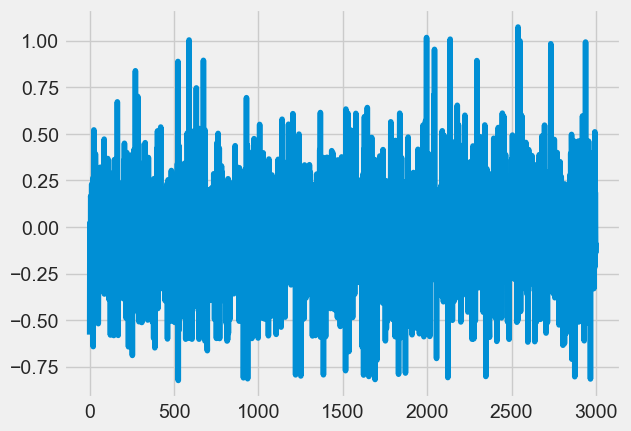

In [ ]:
df6.err.plot() 

### **Perform the LJung-Box test**

In [ ]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(r1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")
print(pvalue)

Fail-to-Reject H0. Good model
[0.99410239]


**Observations:**

Permorning the LJung Box test we see our p value is less than 0.5 so we reject the H0 null hypothesis and We see our model is good

### **Calculate MSE and RMSE of the Model from the test**

In [ ]:
p=3
q=2

In [ ]:
# MSE
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df6.polarity, df6.pred)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(3,2)
	MSE = 0.061919713945168764
	RMSE = 0.2488367214563975


**Observation:**

Our models mean squaed error is 6.1 that is less and thats what we need

###**Forecasting the future values**

In [ ]:
# forecast data
frst = r1.predict(start=len(df5), end=len(df5)+500)
frst

10000    0.184650
10001    0.184302
10002    0.184057
10003    0.184289
10004    0.184074
           ...   
10496    0.184914
10497    0.184915
10498    0.184916
10499    0.184917
10500    0.184918
Name: predicted_mean, Length: 501, dtype: float64

###**Plotting the actual and predicted polarity**

<AxesSubplot:xlabel='reviewTime'>

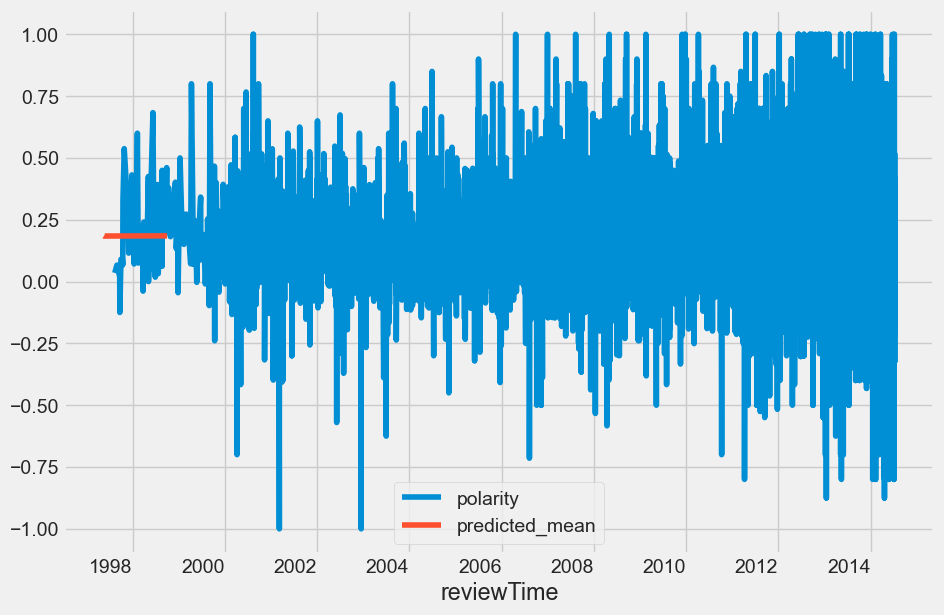

In [ ]:
df5.plot(figsize=(10,8),legend=True)
frst.plot(legend=True,)

###**Un-Supervised Machine Learning -Clustering**

In [ ]:
df4.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,year,Tags_Removed_text,polarity,subjectivity,Analysis_labels
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book tha...,5.0,Wonderful!,1355616000,2012-12-16,2012,spiritu mental inspir allow question moral hel...,-0.050000,0.225000,Negative
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5.0,close to god,1071100800,2003-12-11,2003,must masterpiec spiritu ill first admit litera...,-0.112500,0.558333,Negative
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""","[0, 0]",This book provides a reflection that you can a...,5.0,Must Read for Life Afficianados,1390003200,2014-01-18,2014,provid reflect appli lifeand way tri ass wheth...,0.142857,0.417857,Positive
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,"[0, 0]",I first read THE PROPHET in college back in th...,5.0,Timeless for every good and bad time in your l...,1317081600,2011-09-27,2011,first prophet colleg back 60 reviv anyth metap...,0.081481,0.564815,Positive
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,"[7, 9]",A timeless classic. It is a very demanding an...,5.0,A Modern Rumi,1033948800,2002-10-07,2002,timeless classic demand assum titl gibran back...,0.129924,0.387247,Positive


In [ ]:
df_cluster=df4[['overall','polarity','subjectivity','Analysis_labels']]

In [ ]:
df_cluster.head()

,overall,polarity,subjectivity,Analysis_labels
0,5.0,-0.050000,0.225000,Negative
1,5.0,-0.112500,0.558333,Negative
2,5.0,0.142857,0.417857,Positive
3,5.0,0.081481,0.564815,Positive
4,5.0,0.129924,0.387247,Positive


###**Label Encoding:**
Used to transform non-numerical label-Analysis to numerical label

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df_cluster['analysis']=l.fit_transform(df_cluster['Analysis_labels'])

In [ ]:
df_cluster1=df_cluster.drop(['Analysis_labels'],axis=1)

In [ ]:
df_cluster1

,overall,polarity,subjectivity,analysis
0,5.0,-0.050000,0.225000,0
1,5.0,-0.112500,0.558333,0
2,5.0,0.142857,0.417857,2
3,5.0,0.081481,0.564815,2
4,5.0,0.129924,0.387247,2
...,...,...,...,...
9995,5.0,0.152083,0.467361,2
9996,4.0,0.198214,0.458810,2
9997,4.0,0.167500,0.330833,2
9998,1.0,-0.020030,0.413718,0


**Checking for null values**

In [ ]:
df_cluster1.isna().sum()

overall         0
polarity        0
subjectivity    0
analysis        0
dtype: int64

There are zero nullvalues in our data

###**Kmeans -Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit(df_cluster1)

KMeans(n_clusters=3, random_state=1)

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit(df_cluster1)
label1 = kmeans.labels_
silhouette_score(df_cluster1,label1,metric = 'euclidean')

0.5970852643604937

In [ ]:
df_cluster1['kmeans']=label1

###**Plotting the overall vs Analysis graph**

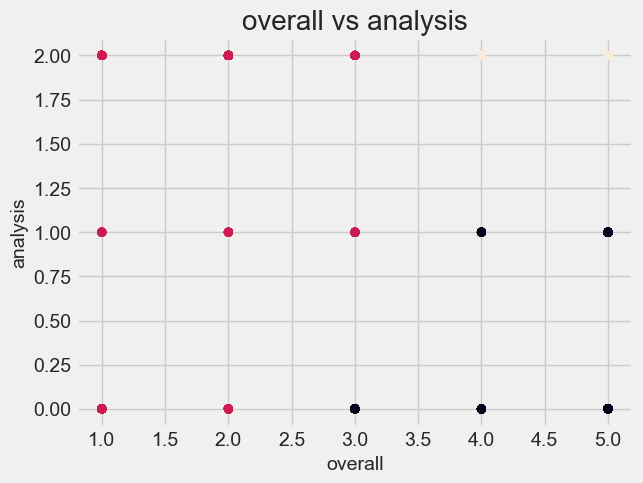

In [ ]:
plt.scatter(x=df_cluster1['overall'],y=df_cluster1['analysis'],c=df_cluster1['kmeans'])
plt.title('overall vs analysis',fontsize=20)
plt.xlabel('overall',fontsize=14)
plt.ylabel('analysis',fontsize=14)
plt.show()

###**Plotting the Elbow Curve**

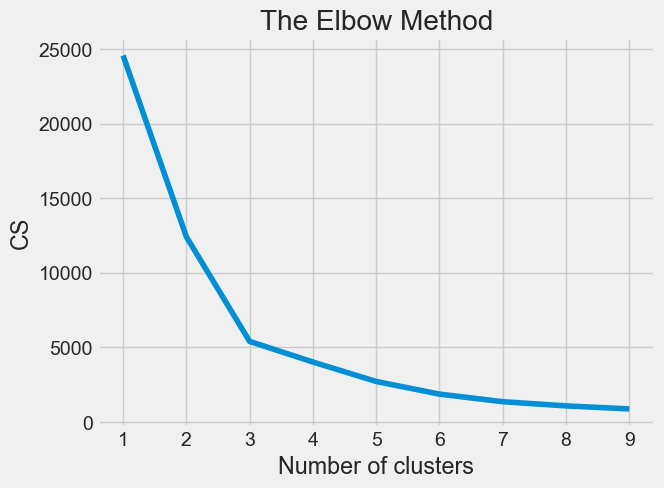

In [ ]:
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_cluster1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

# we can observe that k=3 clusters forms good model using elbow method

###**Plotting the Overall vs Analysis Graph**

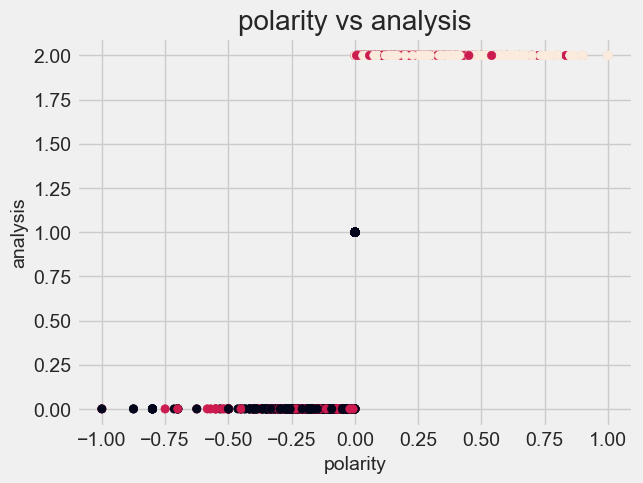

In [ ]:
plt.scatter(x=df_cluster1['polarity'],y=df_cluster1['analysis'],c=df_cluster1['kmeans'])
plt.title('polarity vs analysis',fontsize=20)
plt.xlabel('polarity',fontsize=14)
plt.ylabel('analysis',fontsize=14)
plt.show()

**Oservations:**

white=Positive polarity 

pink=Neutral polarity

black=negative polarity

Observations: In elbow diagram, we can observe that clusters 3 forms good one compared to al other K values

    -> Polarity <0  means whose reviews are negative Forms one cluster that product seems to be bad
    
    -> Polarity =0  means whose reviews are neutral Forms one cluster that product needs to be improved
    
    -> Polarity >0  means whose reviews are positive Forms one cluster that product seems to be good